In [44]:
import numpy as np
import imageio
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.misc import imread, imsave

plt.rcParams['figure.figsize'] = (16,8)

# Problem 1

In [7]:
a, b = -1, 1.
alpha, beta = 1., 7.

#### Define variables x_steps, final_T, time_steps ####
x_steps, final_T, time_steps = 20, 0.2, 250

delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

In [31]:
# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")
    
u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha
guess = u.copy()

In [32]:
def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

    # Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1
    
print("Difference in iterations is ", np.linalg.norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

Difference in iterations is  0.0
Final time =  0.2


Text(0.5, 1.0, 'Discretized Approximate Solution')

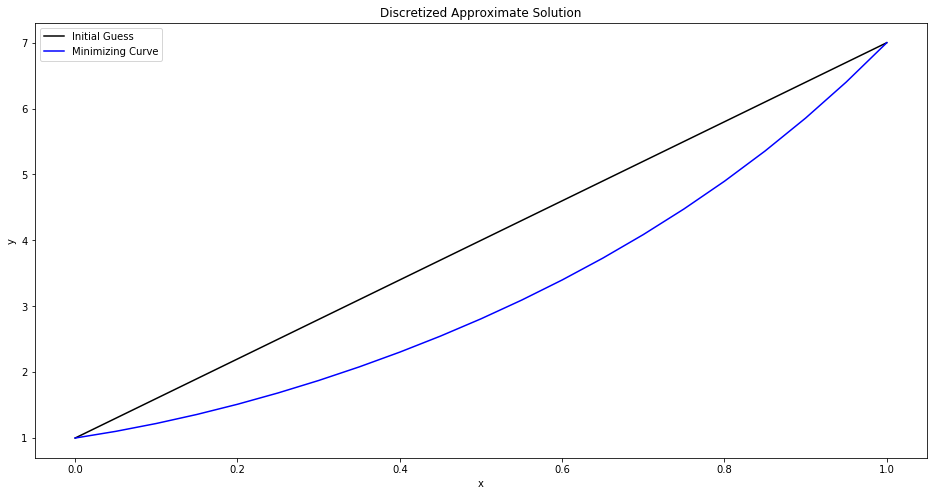

In [36]:
domain = np.linspace(0, 1, len(guess[0]))
plt.plot(domain, guess[0], label="Initial Guess", color="black")
plt.plot(domain, u[0], label="Minimizing Curve", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Discretized Approximate Solution")

# Problem 2

In [45]:
imagename = 'balloons_bw.jpg'
changed_pixels=40000

# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.

IM = imread(imagename, mode="L") * (1. / 255)
IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_,y_ = np.random.randint(1,IM_x-2), np.random.randint(1,IM_y-2)
    val = .1*np.random.randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imsave("noised_"+imagename, IM)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


In [131]:
delta_t, delta_y, delta_x = 1e-3, 1, 1
lamda = 40
time_steps = 250

u = np.array([IM.copy(), IM.copy()])

In [132]:
def rhs(u):
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1) / delta_x**2.
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0) / delta_y**2.
    
    u[1:-1, 1:-1] += -delta_t*(u[1:-1, 1:-1] - IM[1:-1, 1:-1] - lamda * (u_xx[1:-1, 1:-1] + u_yy[1:-1, 1:-1])) 

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

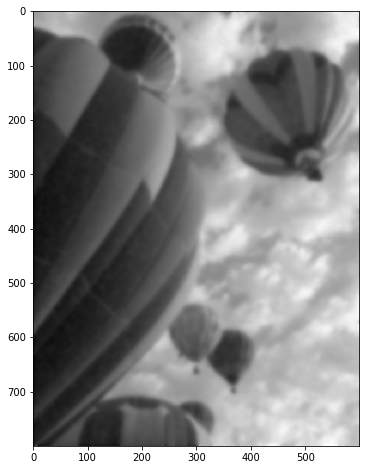

In [133]:
plt.imshow(u[1], cmap="gray")

# Problem 3

In [128]:
delta_t, delta_y, delta_x = 1e-3, 1, 1
lamda = 1
time_steps = 200
epsilon = 1e-5

u = np.array([IM.copy(), IM.copy()])

In [129]:
def rhs(u):
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2.
    u_xy =  (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1) / delta_x**2.
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0) / delta_y**2.
    
    frac = (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_y*u_x*u_xy) / (epsilon + u_x**2 + u_y**2)**(3/2)
    
    u += delta_t * (-lamda * (u - IM) + frac) 

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    rhs(u[1])
    if np.linalg.norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

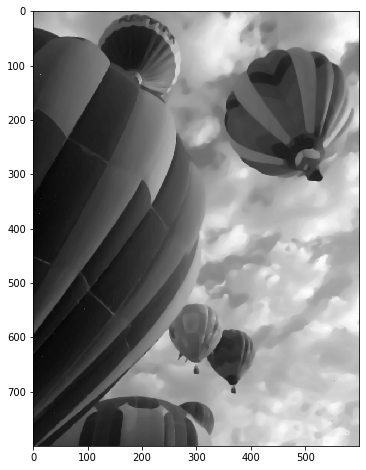

In [130]:
plt.imshow(u[1], cmap="gray")